<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


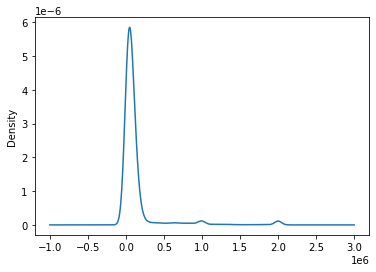

In [4]:
# your code goes here
s = df['ConvertedComp']
ax= s.plot.kde()

Plot the histogram for the column `ConvertedComp`.


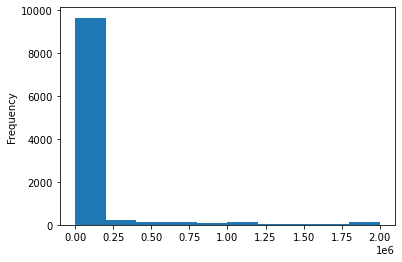

In [5]:
# your code goes here
ax=s.plot.hist()

What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here
s.median()

57745.0

How many responders identified themselves only as a **Man**?


In [18]:
# your code goes here
def count(lst):
    return sum(bool(x)for x in lst)
lst=df['Gender'].str.contains("Man")
count(lst)

10590

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [22]:
# your code goes
ccw = df.drop(df.index[df['Gender']!='Woman'])
ccw['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


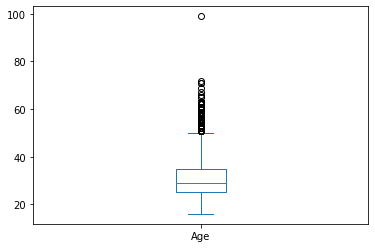

In [79]:
# your code goes here
ax=df['Age'].plot.box()

Plot a histogram of the column `Age`.


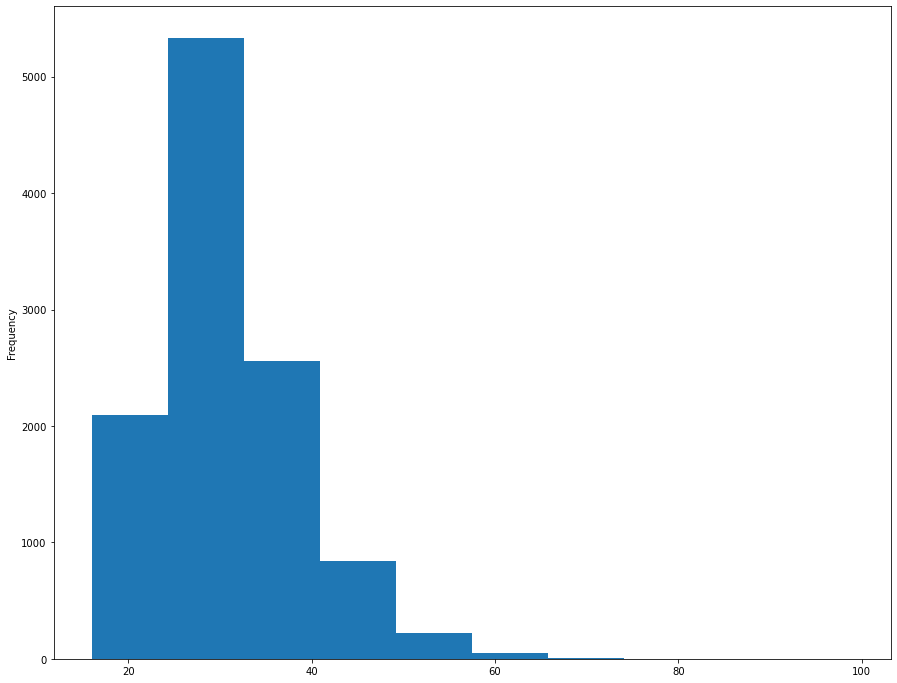

In [73]:
# your code goes here
s=df['Age']
ax=s.plot.hist(figsize=(15,12))

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


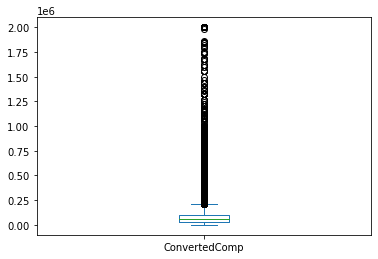

In [34]:
# your code goes here
ax=s.plot.box()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [35]:
# your code goes here
print(s.quantile(0.75))
print(s.quantile(0.25))

100000.0
26868.0


Find out the upper and lower bounds.


In [36]:
# your code goes here
print((s.quantile(0.75))*1.5)
print((s.quantile(0.25))/1.5)

150000.0
17912.0


Identify how many outliers are there in the `ConvertedComp` column.


In [43]:
# your code goes here
#count the numbers above 150,000 and below 17912
sorted(s)


[3468.0,
 4128.0,
 4198.0,
 5597.0,
 6300.0,
 7696.0,
 9144.0,
 11194.0,
 13440.0,
 16008.0,
 16500.0,
 16613.0,
 16788.0,
 17491.0,
 19590.0,
 20623.0,
 26388.0,
 28248.0,
 30684.0,
 31140.0,
 32081.0,
 35006.0,
 35329.0,
 36060.0,
 36265.0,
 36664.0,
 39254.0,
 41244.0,
 41871.0,
 41871.0,
 43180.0,
 45803.0,
 47300.0,
 48413.0,
 51150.0,
 51312.0,
 52339.0,
 53647.0,
 57287.0,
 60000.0,
 61000.0,
 61463.0,
 63016.0,
 65277.0,
 66000.0,
 66000.0,
 66276.0,
 66750.0,
 68268.0,
 69000.0,
 71100.0,
 75000.0,
 77911.0,
 82494.0,
 85931.0,
 87994.0,
 87996.0,
 89364.0,
 90000.0,
 90000.0,
 92000.0,
 95179.0,
 97389.0,
 100000.0,
 100000.0,
 103000.0,
 106000.0,
 107000.0,
 110000.0,
 114000.0,
 114575.0,
 117540.0,
 120000.0,
 140000.0,
 146000.0,
 150000.0,
 156000.0,
 220000.0,
 225000.0,
 400000.0,
 455352.0,
 481212.0,
 522456.0,
 930612.0,
 1100000.0,
 nan,
 2016.0,
 2169.0,
 7556.0,
 9095.0,
 9120.0,
 13116.0,
 17280.0,
 21612.0,
 24504.0,
 26000.0,
 28860.0,
 32196.0,
 35518.0,
 36

In [55]:
len(df[df['ConvertedComp']>150000])

1239

In [69]:
clean_df=df[(df['ConvertedComp']>17912.0) & (df['ConvertedComp']<150000.0)]

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [70]:
# your code goes here
clean_df

Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
5              19  I am a developer by profession      Yes   
...           ...                             ...      ...   
11391       25133  I am a developer by profession       No   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
4      Less than once a month but more than once per ...   
5                                                  Never   
...                                                  ...   
11391                            Less than once per year   
11393                                              Never   
11394                                              Never   
11395                            Less than once per year   
11396  Less than once a month but more than once per ...   

                                              OpenSource          Employment  \
0      The quality of OSS and closed source software ...  Employed full-time   
1      The quality of OSS and closed source software ...  Employed full-time   
2      OSS is, on average, of HIGHER quality than pro...  Employed full-time   
4      The quality of OSS and closed source software ...  Employed full-time   
5      The quality of OSS and closed source software ...  Employed full-time   
...                                                  ...                 ...   
11391  The quality of OSS and closed source software ...  Employed full-time   
11393  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
11394  The quality of OSS and closed source software ...  Employed full-time   
11395  The quality of OSS and closed source software ...  Employed full-time   
11396  OSS is, on average, of LOWER quality than prop...  Employed full-time   

             Country         Student  \
0      United States              No   
1        New Zealand              No   
2      United States              No   
4          Australia              No   
5             Brazil              No   
...              ...             ...   
11391        Belgium  Yes, full-time   
11393  United States              No   
11394         Poland              No   
11395  United States              No   
11396    Switzerland              No   

                                                 EdLevel  \
0               Bachelor’s degree (BA, BS, B.Eng., etc.)   
1      Some college/university study without earning ...   
2            Master’s degree (MA, MS, M.Eng., MBA, etc.)   
4               Bachelor’s degree (BA, BS, B.Eng., etc.)   
5      Some college/university study without earning ...   
...                                                  ...   
11391        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
11393        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
11394        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
11395        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
11396  Secondary school (e.g. American high school, G...   

                                          UndergradMajor  ...  \
0      Computer science, computer engineering, or sof...  ...   
1      Computer science, computer engineering, or sof...  ...   
2      Computer science, computer engineering, or sof...  ...   
4      Computer science, computer engineering, or sof...  ...   
5      Computer science, computer engineering, or sof

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [89]:
# your code goes h


TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [72]:
df['Age'].median()

29.0

In [74]:
df['ConvertedComp'].median()

57745.0

In [91]:
clean_df['ConvertedComp'].mean()

65829.98690251147

In [100]:
lower_bounds= med-(1.5*q1)
upper_bounds= med+(1.5*q3)
ccub=upper_bounds.ConvertedComp
cclb=lower_bounds.ConvertedComp
print(ccub,cclb)

207745.0 17443.0


In [105]:
df[(df['ConvertedComp']<17443.0)]  

Respondent                      MainBranch Hobbyist  \
10             25  I am a developer by profession       No   
19             50  I am a developer by profession      Yes   
28             68  I am a developer by profession      Yes   
30             71  I am a developer by profession      Yes   
34             78  I am a developer by profession       No   
...           ...                             ...      ...   
11376       25100  I am a developer by profession      Yes   
11378       25105  I am a developer by profession      Yes   
11379       25108  I am a developer by profession      Yes   
11388       25124  I am a developer by profession      Yes   
11392       25134  I am a developer by profession      Yes   

                                             OpenSourcer  \
10                                                 Never   
19                            Once a month or more often   
28     Less than once a month but more than once per ...   
30                                                 Never   
34     Less than once a month but more than once per ...   
...                                                  ...   
11376                            Less than once per year   
11378                            Less than once per year   
11379                            Less than once per year   
11388                         Once a month or more often   
11392  Less than once a month but more than once per ...   

                                              OpenSource          Employment  \
10     OSS is, on average, of HIGHER quality than pro...  Employed full-time   
19     OSS is, on average, of LOWER quality than prop...  Employed full-time   
28     OSS is, on average, of LOWER quality than prop...  Employed full-time   
30     The quality of OSS and closed source software ...  Employed full-time   
34     The quality of OSS and closed source software ...  Employed full-time   
...                                                  ...                 ...   
11376  The quality of OSS and closed source software ...  Employed full-time   
11378  The quality of OSS and closed source software ...  Employed full-time   
11379  The quality of OSS and closed source software ...  Employed full-time   
11388  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
11392  OSS is, on average, of HIGHER quality than pro...  Employed full-time   

            Country         Student  \
10     South Africa              No   
19            India              No   
28            India              No   
30      Philippines              No   
34            India  Yes, full-time   
...             ...             ...   
11376       Albania              No   
11378         India              No   
11379        Serbia              No   
11388         India  Yes, full-time   
11392       Ecuador              No   

                                                 EdLevel  \
10                                      Associate degree   
19              Bachelor’s degree (BA, BS, B.Eng., etc.)   
28              Bachelor’s degree (BA, BS, B.Eng., etc.)   
30              Bachelor’s degree (BA, BS, B.Eng., etc.)   
34              Bachelor’s degree (BA, BS, B.Eng., etc.)   
...                                                  ...   
11376        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
11378           Bachelor’s degree (BA, BS, B.Eng., etc.)   
11379                 Professional degree (JD, MD, etc.)   
11388  Some college/university study without earning ...   
11392           Bachelor’s degree (BA, BS, B.Eng., etc.)   

                                          UndergradMajor  ...  \
10     Computer science, computer engineering, or sof...  ...   
19     Another engineering discipline (ex. civil, ele...  ...   
28                         Web development or web design  ...   
30     Computer science, computer engineering, or sof...  ...   
34     Computer science, computer engineering, or sof...  ...   


In [106]:
df[(df['ConvertedComp']>207745.0)]

Respondent                                         MainBranch Hobbyist  \
3              16                     I am a developer by profession      Yes   
13             32                     I am a developer by profession       No   
45            100                     I am a developer by profession      Yes   
46            102                     I am a developer by profession       No   
60            128  I am not primarily a developer, but I write co...      Yes   
...           ...                                                ...      ...   
11296       24915                     I am a developer by profession      Yes   
11303       24931                     I am a developer by profession       No   
11350       25036                     I am a developer by profession      Yes   
11353       25047                     I am a developer by profession      Yes   
11369       25086                     I am a developer by profession      Yes   

                                             OpenSourcer  \
3                                                  Never   
13                                                 Never   
45                            Once a month or more often   
46                                                 Never   
60                            Once a month or more often   
...                                                  ...   
11296                                              Never   
11303                            Less than once per year   
11350                                              Never   
11353  Less than once a month but more than once per ...   
11369  Less than once a month but more than once per ...   

                                              OpenSource          Employment  \
3      The quality of OSS and closed source software ...  Employed full-time   
13     The quality of OSS and closed source software ...  Employed full-time   
45     The quality of OSS and closed source software ...  Employed full-time   
46     The quality of OSS and closed source software ...  Employed full-time   
60     OSS is, on average, of HIGHER quality than pro...  Employed full-time   
...                                                  ...                 ...   
11296  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
11303  OSS is, on average, of HIGHER quality than pro...  Employed full-time   
11350  The quality of OSS and closed source software ...  Employed full-time   
11353  The quality of OSS and closed source software ...  Employed full-time   
11369  The quality of OSS and closed source software ...  Employed full-time   

              Country Student  \
3      United Kingdom      No   
13      United States      No   
45             Canada      No   
46      United States      No   
60     United Kingdom      No   
...               ...     ...   
11296   United States      No   
11303     Switzerland      No   
11350   United States      No   
11353   United States      No   
11369         Germany      No   

                                                 EdLevel  \
3            Master’s degree (MA, MS, M.Eng., MBA, etc.)   
13                                      Associate degree   
45     Some college/university study without earning ...   
46              Bachelor’s degree (BA, BS, B.Eng., etc.)   
60              Bachelor’s degree (BA, BS, B.Eng., etc.)   
...                                                  ...   
11296        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
11303           Bachelor’s degree (BA, BS, B.Eng., etc.)   
11350        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
11353        Master’s degree (MA, MS, M.Eng., MBA, etc.)   
11369        Master’s degree (MA, MS, M.Eng., MBA, etc.)   

                                          UndergradMajor  ...  \
3                                                    NaN  ...   
13     Information systems, information technology, o...  ...   
45     Computer science, computer engin

In [108]:
clean_df=df[(df['ConvertedComp']>17443.0) & (df['ConvertedComp']<207745.0)]  

In [109]:
clean_df

Respondent     CompTotal  ConvertedComp  WorkWeekHrs   CodeRevHrs  \
count   7910.000000  7.910000e+03    7910.000000  7887.000000  6313.000000   
mean   12515.457016  5.231458e+05   71315.753729    42.434880     4.440109   
std     7261.308566  6.771414e+06   39843.304986    25.073043     3.688694   
min        4.000000  3.270000e+02   17472.000000     4.000000     0.000000   
25%     6192.000000  3.000000e+04   40000.000000    40.000000     2.000000   
50%    12604.500000  6.850000e+04   63318.000000    40.000000     4.000000   
75%    18861.750000  1.150000e+05   95000.000000    42.000000     5.000000   
max    25141.000000  3.900000e+08  206415.000000  1012.000000    50.000000   

               Age  
count  7742.000000  
mean     31.698243  
std       7.432013  
min      16.000000  
25%      26.000000  
50%      30.000000  
75%      36.000000  
max      99.000000

In [111]:
clean_df.mean()

/tmp/wsuser/ipykernel_741/28649699.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  clean_df.mean()


Respondent        12515.457016
CompTotal        523145.845891
ConvertedComp     71315.753729
WorkWeekHrs          42.434880
CodeRevHrs            4.440109
Age                  31.698243
dtype: float64

In [110]:
clean_df.median()

/tmp/wsuser/ipykernel_741/1656665961.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  clean_df.median()


Respondent       12604.5
CompTotal        68500.0
ConvertedComp    63318.0
WorkWeekHrs         40.0
CodeRevHrs           4.0
Age                 30.0
dtype: float64

In [112]:
df.corr()

Respondent  CompTotal  ConvertedComp  WorkWeekHrs  CodeRevHrs  \
Respondent       1.000000  -0.013490       0.002181    -0.015314    0.004621   
CompTotal       -0.013490   1.000000       0.001037     0.003510    0.007063   
ConvertedComp    0.002181   0.001037       1.000000     0.021143   -0.033865   
WorkWeekHrs     -0.015314   0.003510       0.021143     1.000000    0.026517   
CodeRevHrs       0.004621   0.007063      -0.033865     0.026517    1.000000   
Age              0.004041   0.006970       0.105386     0.036518   -0.020469   

                    Age  
Respondent     0.004041  
CompTotal      0.006970  
ConvertedComp  0.105386  
WorkWeekHrs    0.036518  
CodeRevHrs    -0.020469  
Age            1.000000

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
